# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

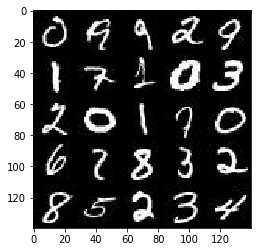

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

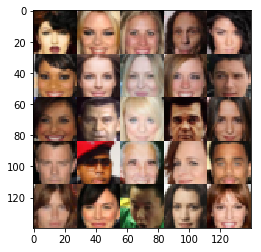

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels))
    inputs_z = tf.placeholder(tf.float32, (None, z_dim))
    lrate = tf.placeholder(tf.float32)
    
    return (inputs_real, inputs_z, lrate)


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    alpha  = 0.2
    with tf.variable_scope('discriminator', reuse=reuse):
        #input layer is 28x28x3
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        bn1 = tf.layers.batch_normalization(x1, training=True)
        relu1 = tf.maximum(alpha*bn1, bn1)
        relu1 = tf.layers.dropout(relu1, 0.75)
        #14x14x64
        
        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(alpha*bn2, bn2)
        relu2 = tf.layers.dropout(relu2, 0.75)
        #7x7x128
        
        
        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(alpha*bn3, bn3)
        relu3 = tf.layers.dropout(relu3, 0.75)
        #4x4x256
        
        #flattern the layer
        flattern = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flattern, 1)
        out = tf.sigmoid(logits)

    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.2
    with tf.variable_scope('generator', reuse=not is_train):
        #first fully connected layer
        x1 = tf.layers.dense(z, 7 * 7 * 512)
        
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha*x1, x1)
        x1 = tf.layers.dropout(x1, 0.75)
        # 7 x 7 x 512
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=1, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha*x2, x2)
        x2 = tf.layers.dropout(x2, 0.75)
        #7 x 7 x 256
        
        x22 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x22 = tf.layers.batch_normalization(x22, training=is_train)
        x22 = tf.maximum(alpha*x22, x22)
        x22 = tf.layers.dropout(x22, 0.75)
        #14 x 14 x 128 
        
        x33 = tf.layers.conv2d_transpose(x22, 64, 5, strides=1, padding='same')
        x33 = tf.layers.batch_normalization(x33, training=is_train)
        x33 = tf.maximum(alpha*x33, x33)
        x33 = tf.layers.dropout(x33, 0.75)
        #14 x 14 x 64
        
        x3 = tf.layers.conv2d_transpose(x33, 32, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha*x3, x3)
        x3 = tf.layers.dropout(x3, 0.75)
        #28 x 28 x 32
        
        #output layer
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=1, padding='same')
        # 28 x 28 x out_channel_dim
        
        out = tf.tanh(logits)
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real))
    )
    
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake))
    )
    
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake))
    )
    
    d_loss = d_loss_real + d_loss_fake
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    # optimize starts
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    
    print_every = 10
    show_every = 100
    
    # do we need to reste the graph?
    #tf.reset_default_graph()
    #not sure about lrate, learning_rate
    input_real, input_z, lrate = model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, data_shape[3]) 
    d_opt, g_opt = model_opt(d_loss, g_loss, lrate, beta1)
    
    steps = 0
    samples, losses = [], []
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                
                steps += 1
                batch_images = batch_images * 2 # scaling to [-1,1]
                
                # sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                # run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lrate: 0.001})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images, lrate: 0.001})
                
                if steps % print_every == 0:
                    # at the end of each epoch , get the losses and print them out
                    train_loss_d = d_loss.eval({input_z:batch_z, input_real:batch_images})
                    train_loss_g = g_loss.eval({input_z:batch_z})
                    
                    print ("Epoch {}/{}...".format(epoch_i+1, epochs), 
                           "Discriminator Loss: {:.4f}...".format(train_loss_d),
                           "Generator Loss: {:.4f}".format(train_loss_g))
                    losses.append((train_loss_d, train_loss_g))
                
                if steps % show_every == 0:
                    show_generator_output(sess, 10, input_z, data_shape[3], data_image_mode) 
                    
                    
    return losses, samples
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.6587... Generator Loss: 4.2217
Epoch 1/2... Discriminator Loss: 0.5162... Generator Loss: 2.0827
Epoch 1/2... Discriminator Loss: 0.2820... Generator Loss: 4.7387
Epoch 1/2... Discriminator Loss: 0.7001... Generator Loss: 1.7274
Epoch 1/2... Discriminator Loss: 1.0078... Generator Loss: 1.0726
Epoch 1/2... Discriminator Loss: 0.5009... Generator Loss: 3.6664
Epoch 1/2... Discriminator Loss: 1.1638... Generator Loss: 3.7514
Epoch 1/2... Discriminator Loss: 2.0008... Generator Loss: 0.2609
Epoch 1/2... Discriminator Loss: 1.1062... Generator Loss: 1.2014
Epoch 1/2... Discriminator Loss: 1.4767... Generator Loss: 0.9192


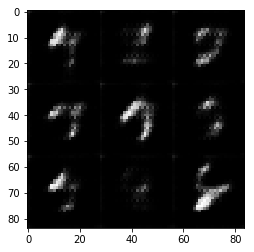

Epoch 1/2... Discriminator Loss: 1.3115... Generator Loss: 0.6150
Epoch 1/2... Discriminator Loss: 0.7744... Generator Loss: 1.5069
Epoch 1/2... Discriminator Loss: 1.5650... Generator Loss: 1.2300
Epoch 1/2... Discriminator Loss: 1.3536... Generator Loss: 1.0681
Epoch 1/2... Discriminator Loss: 0.5802... Generator Loss: 1.7000
Epoch 1/2... Discriminator Loss: 1.3122... Generator Loss: 1.7595
Epoch 1/2... Discriminator Loss: 1.4267... Generator Loss: 0.7139
Epoch 1/2... Discriminator Loss: 0.8747... Generator Loss: 1.9573
Epoch 1/2... Discriminator Loss: 0.8028... Generator Loss: 1.3008
Epoch 1/2... Discriminator Loss: 1.5142... Generator Loss: 0.4604


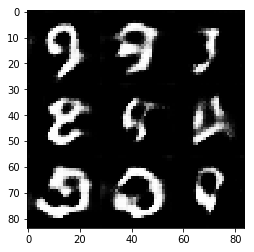

Epoch 1/2... Discriminator Loss: 1.2531... Generator Loss: 0.7083
Epoch 1/2... Discriminator Loss: 1.3464... Generator Loss: 0.8914
Epoch 1/2... Discriminator Loss: 0.9866... Generator Loss: 1.1084
Epoch 1/2... Discriminator Loss: 0.9393... Generator Loss: 0.9003
Epoch 1/2... Discriminator Loss: 1.5447... Generator Loss: 1.1233
Epoch 1/2... Discriminator Loss: 0.9179... Generator Loss: 1.7315
Epoch 1/2... Discriminator Loss: 1.1674... Generator Loss: 0.6370
Epoch 1/2... Discriminator Loss: 1.0375... Generator Loss: 1.2081
Epoch 1/2... Discriminator Loss: 1.3448... Generator Loss: 0.5791
Epoch 1/2... Discriminator Loss: 0.7799... Generator Loss: 1.3762


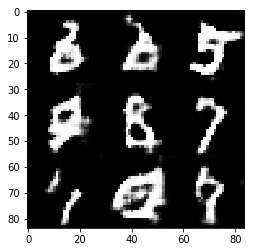

Epoch 1/2... Discriminator Loss: 1.3653... Generator Loss: 1.1183
Epoch 1/2... Discriminator Loss: 1.5011... Generator Loss: 0.7537
Epoch 1/2... Discriminator Loss: 1.3442... Generator Loss: 1.0532
Epoch 1/2... Discriminator Loss: 1.4717... Generator Loss: 0.5234
Epoch 1/2... Discriminator Loss: 1.2915... Generator Loss: 0.6687
Epoch 1/2... Discriminator Loss: 1.2125... Generator Loss: 1.1159
Epoch 1/2... Discriminator Loss: 1.1279... Generator Loss: 0.8644
Epoch 1/2... Discriminator Loss: 1.4568... Generator Loss: 1.1865
Epoch 1/2... Discriminator Loss: 1.1576... Generator Loss: 1.8523
Epoch 1/2... Discriminator Loss: 1.0964... Generator Loss: 0.8702


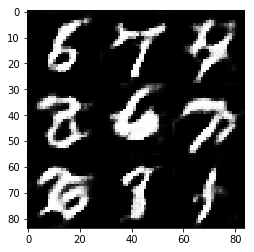

Epoch 1/2... Discriminator Loss: 1.1480... Generator Loss: 0.7297
Epoch 1/2... Discriminator Loss: 1.0399... Generator Loss: 1.3931
Epoch 1/2... Discriminator Loss: 0.8045... Generator Loss: 1.3909
Epoch 1/2... Discriminator Loss: 1.2988... Generator Loss: 0.5688
Epoch 1/2... Discriminator Loss: 1.0320... Generator Loss: 1.0741
Epoch 1/2... Discriminator Loss: 0.9773... Generator Loss: 1.1780
Epoch 2/2... Discriminator Loss: 0.9132... Generator Loss: 1.3208
Epoch 2/2... Discriminator Loss: 1.1261... Generator Loss: 0.7613
Epoch 2/2... Discriminator Loss: 0.9272... Generator Loss: 0.9841
Epoch 2/2... Discriminator Loss: 1.0598... Generator Loss: 1.1074


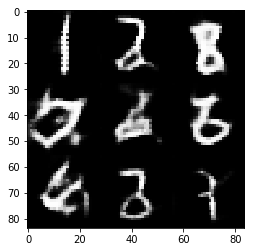

Epoch 2/2... Discriminator Loss: 0.9934... Generator Loss: 1.0727
Epoch 2/2... Discriminator Loss: 1.1960... Generator Loss: 0.7727
Epoch 2/2... Discriminator Loss: 1.4983... Generator Loss: 0.5050
Epoch 2/2... Discriminator Loss: 0.8146... Generator Loss: 1.1250
Epoch 2/2... Discriminator Loss: 0.9568... Generator Loss: 1.1151
Epoch 2/2... Discriminator Loss: 1.1092... Generator Loss: 0.8218
Epoch 2/2... Discriminator Loss: 0.9864... Generator Loss: 1.3507
Epoch 2/2... Discriminator Loss: 0.9543... Generator Loss: 1.2130
Epoch 2/2... Discriminator Loss: 1.0700... Generator Loss: 1.2974
Epoch 2/2... Discriminator Loss: 1.2389... Generator Loss: 1.5808


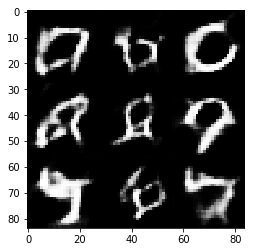

Epoch 2/2... Discriminator Loss: 0.9970... Generator Loss: 1.3368
Epoch 2/2... Discriminator Loss: 0.9629... Generator Loss: 1.2552
Epoch 2/2... Discriminator Loss: 1.2978... Generator Loss: 1.1961
Epoch 2/2... Discriminator Loss: 1.1075... Generator Loss: 2.0342
Epoch 2/2... Discriminator Loss: 0.9858... Generator Loss: 1.2722
Epoch 2/2... Discriminator Loss: 1.1731... Generator Loss: 0.8287
Epoch 2/2... Discriminator Loss: 1.2380... Generator Loss: 1.7745
Epoch 2/2... Discriminator Loss: 1.2819... Generator Loss: 0.9044
Epoch 2/2... Discriminator Loss: 1.2648... Generator Loss: 0.7013
Epoch 2/2... Discriminator Loss: 1.2191... Generator Loss: 0.8452


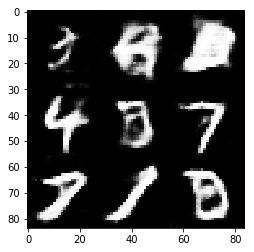

Epoch 2/2... Discriminator Loss: 1.1254... Generator Loss: 1.3369
Epoch 2/2... Discriminator Loss: 1.1318... Generator Loss: 1.0193
Epoch 2/2... Discriminator Loss: 1.3571... Generator Loss: 1.7124
Epoch 2/2... Discriminator Loss: 1.2194... Generator Loss: 0.6661
Epoch 2/2... Discriminator Loss: 1.0612... Generator Loss: 0.8719
Epoch 2/2... Discriminator Loss: 0.9589... Generator Loss: 1.3108
Epoch 2/2... Discriminator Loss: 1.3130... Generator Loss: 0.6786
Epoch 2/2... Discriminator Loss: 1.1223... Generator Loss: 0.7547
Epoch 2/2... Discriminator Loss: 1.1733... Generator Loss: 1.2050
Epoch 2/2... Discriminator Loss: 1.0250... Generator Loss: 1.4588


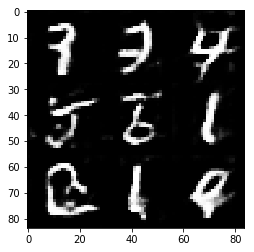

Epoch 2/2... Discriminator Loss: 1.0756... Generator Loss: 0.8940
Epoch 2/2... Discriminator Loss: 1.3068... Generator Loss: 2.1216
Epoch 2/2... Discriminator Loss: 1.2294... Generator Loss: 1.4489
Epoch 2/2... Discriminator Loss: 1.1902... Generator Loss: 0.8929
Epoch 2/2... Discriminator Loss: 1.4028... Generator Loss: 0.4886
Epoch 2/2... Discriminator Loss: 1.0066... Generator Loss: 0.7933
Epoch 2/2... Discriminator Loss: 1.1965... Generator Loss: 0.7863
Epoch 2/2... Discriminator Loss: 1.0953... Generator Loss: 1.3321
Epoch 2/2... Discriminator Loss: 1.1656... Generator Loss: 0.8788
Epoch 2/2... Discriminator Loss: 1.2826... Generator Loss: 0.6622


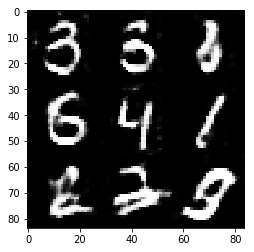

Epoch 2/2... Discriminator Loss: 1.5822... Generator Loss: 0.4001
Epoch 2/2... Discriminator Loss: 1.1668... Generator Loss: 0.6486
Epoch 2/2... Discriminator Loss: 1.3317... Generator Loss: 0.9557


In [14]:
batch_size = 128
z_dim = 100
learning_rate = 0.002
beta1 = 0.6


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 0.2003... Generator Loss: 12.6790
Epoch 1/1... Discriminator Loss: 3.6064... Generator Loss: 0.4034
Epoch 1/1... Discriminator Loss: 4.0871... Generator Loss: 0.3969
Epoch 1/1... Discriminator Loss: 1.4803... Generator Loss: 0.5336
Epoch 1/1... Discriminator Loss: 1.3282... Generator Loss: 0.4323
Epoch 1/1... Discriminator Loss: 2.4900... Generator Loss: 0.2480
Epoch 1/1... Discriminator Loss: 0.7599... Generator Loss: 1.2427
Epoch 1/1... Discriminator Loss: 1.2779... Generator Loss: 1.0855
Epoch 1/1... Discriminator Loss: 1.9504... Generator Loss: 0.7197
Epoch 1/1... Discriminator Loss: 1.3756... Generator Loss: 1.4662


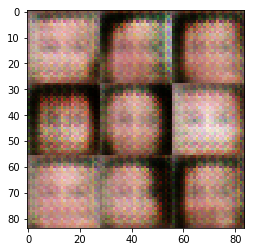

Epoch 1/1... Discriminator Loss: 1.4580... Generator Loss: 0.5221
Epoch 1/1... Discriminator Loss: 1.1453... Generator Loss: 0.6165
Epoch 1/1... Discriminator Loss: 1.4240... Generator Loss: 0.6395
Epoch 1/1... Discriminator Loss: 1.6723... Generator Loss: 0.3498
Epoch 1/1... Discriminator Loss: 1.9752... Generator Loss: 0.2232
Epoch 1/1... Discriminator Loss: 1.4939... Generator Loss: 0.6194
Epoch 1/1... Discriminator Loss: 1.5883... Generator Loss: 1.8077
Epoch 1/1... Discriminator Loss: 1.6309... Generator Loss: 0.4384
Epoch 1/1... Discriminator Loss: 1.1261... Generator Loss: 1.0272
Epoch 1/1... Discriminator Loss: 1.3739... Generator Loss: 0.6262


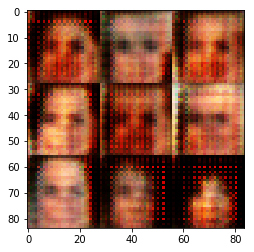

Epoch 1/1... Discriminator Loss: 1.2165... Generator Loss: 0.9144
Epoch 1/1... Discriminator Loss: 1.3835... Generator Loss: 1.0151
Epoch 1/1... Discriminator Loss: 1.6200... Generator Loss: 0.3043
Epoch 1/1... Discriminator Loss: 1.1090... Generator Loss: 0.6814
Epoch 1/1... Discriminator Loss: 1.2258... Generator Loss: 0.8696
Epoch 1/1... Discriminator Loss: 1.5072... Generator Loss: 0.4126
Epoch 1/1... Discriminator Loss: 1.3211... Generator Loss: 0.9446
Epoch 1/1... Discriminator Loss: 1.2998... Generator Loss: 0.6052
Epoch 1/1... Discriminator Loss: 1.3915... Generator Loss: 1.0390
Epoch 1/1... Discriminator Loss: 1.4791... Generator Loss: 1.2832


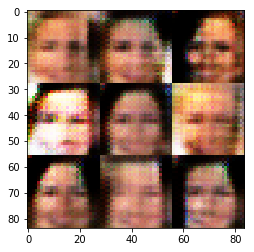

Epoch 1/1... Discriminator Loss: 1.2962... Generator Loss: 0.6469
Epoch 1/1... Discriminator Loss: 1.1446... Generator Loss: 0.8472
Epoch 1/1... Discriminator Loss: 1.4019... Generator Loss: 0.4442
Epoch 1/1... Discriminator Loss: 1.6226... Generator Loss: 0.4798
Epoch 1/1... Discriminator Loss: 1.0313... Generator Loss: 1.0337
Epoch 1/1... Discriminator Loss: 1.5727... Generator Loss: 0.9595
Epoch 1/1... Discriminator Loss: 1.3283... Generator Loss: 0.7300
Epoch 1/1... Discriminator Loss: 1.0849... Generator Loss: 0.7491
Epoch 1/1... Discriminator Loss: 1.2037... Generator Loss: 1.0796
Epoch 1/1... Discriminator Loss: 1.5272... Generator Loss: 0.5445


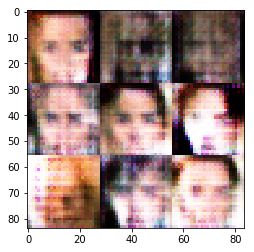

Epoch 1/1... Discriminator Loss: 1.6113... Generator Loss: 0.6165
Epoch 1/1... Discriminator Loss: 1.2655... Generator Loss: 0.9065
Epoch 1/1... Discriminator Loss: 1.3429... Generator Loss: 0.4531
Epoch 1/1... Discriminator Loss: 1.3659... Generator Loss: 0.7213
Epoch 1/1... Discriminator Loss: 1.4702... Generator Loss: 1.2752
Epoch 1/1... Discriminator Loss: 1.2278... Generator Loss: 1.0813
Epoch 1/1... Discriminator Loss: 1.3333... Generator Loss: 1.0637
Epoch 1/1... Discriminator Loss: 1.3135... Generator Loss: 0.3992
Epoch 1/1... Discriminator Loss: 1.4080... Generator Loss: 0.8400
Epoch 1/1... Discriminator Loss: 1.2488... Generator Loss: 0.9893


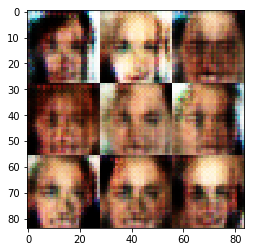

Epoch 1/1... Discriminator Loss: 1.3522... Generator Loss: 0.6471
Epoch 1/1... Discriminator Loss: 1.5611... Generator Loss: 1.5167
Epoch 1/1... Discriminator Loss: 1.4303... Generator Loss: 0.5589
Epoch 1/1... Discriminator Loss: 1.1879... Generator Loss: 0.7326
Epoch 1/1... Discriminator Loss: 1.4093... Generator Loss: 1.0018
Epoch 1/1... Discriminator Loss: 1.3136... Generator Loss: 0.7150
Epoch 1/1... Discriminator Loss: 1.2185... Generator Loss: 0.8664
Epoch 1/1... Discriminator Loss: 1.2329... Generator Loss: 0.6639
Epoch 1/1... Discriminator Loss: 1.3252... Generator Loss: 0.9677
Epoch 1/1... Discriminator Loss: 1.4919... Generator Loss: 1.7016


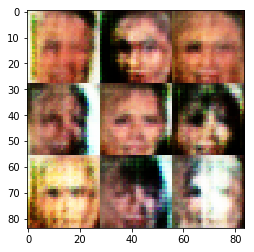

Epoch 1/1... Discriminator Loss: 1.4634... Generator Loss: 0.4486
Epoch 1/1... Discriminator Loss: 1.7123... Generator Loss: 0.3781
Epoch 1/1... Discriminator Loss: 1.3211... Generator Loss: 1.4774
Epoch 1/1... Discriminator Loss: 1.6836... Generator Loss: 0.3195
Epoch 1/1... Discriminator Loss: 1.2422... Generator Loss: 0.6974
Epoch 1/1... Discriminator Loss: 1.3022... Generator Loss: 0.5704
Epoch 1/1... Discriminator Loss: 1.4473... Generator Loss: 1.6541
Epoch 1/1... Discriminator Loss: 1.3033... Generator Loss: 0.6115
Epoch 1/1... Discriminator Loss: 1.3549... Generator Loss: 0.5710
Epoch 1/1... Discriminator Loss: 1.4831... Generator Loss: 0.5209


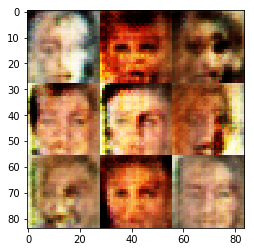

Epoch 1/1... Discriminator Loss: 1.4996... Generator Loss: 1.1811
Epoch 1/1... Discriminator Loss: 1.2580... Generator Loss: 0.6276
Epoch 1/1... Discriminator Loss: 1.1708... Generator Loss: 0.6309
Epoch 1/1... Discriminator Loss: 1.2637... Generator Loss: 0.8617
Epoch 1/1... Discriminator Loss: 1.2159... Generator Loss: 0.8836
Epoch 1/1... Discriminator Loss: 1.6785... Generator Loss: 0.4003
Epoch 1/1... Discriminator Loss: 1.4701... Generator Loss: 0.9103
Epoch 1/1... Discriminator Loss: 1.3034... Generator Loss: 0.7555
Epoch 1/1... Discriminator Loss: 1.3089... Generator Loss: 0.8695
Epoch 1/1... Discriminator Loss: 1.3000... Generator Loss: 0.7996


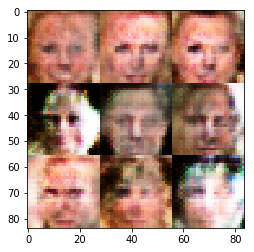

Epoch 1/1... Discriminator Loss: 1.3256... Generator Loss: 0.5396
Epoch 1/1... Discriminator Loss: 1.8211... Generator Loss: 0.2739
Epoch 1/1... Discriminator Loss: 1.1606... Generator Loss: 0.7473
Epoch 1/1... Discriminator Loss: 1.3434... Generator Loss: 1.1272
Epoch 1/1... Discriminator Loss: 1.2687... Generator Loss: 0.9250
Epoch 1/1... Discriminator Loss: 1.4159... Generator Loss: 0.4745
Epoch 1/1... Discriminator Loss: 1.3274... Generator Loss: 0.7085
Epoch 1/1... Discriminator Loss: 1.4158... Generator Loss: 0.4031
Epoch 1/1... Discriminator Loss: 1.6756... Generator Loss: 1.6955
Epoch 1/1... Discriminator Loss: 1.3285... Generator Loss: 0.8909


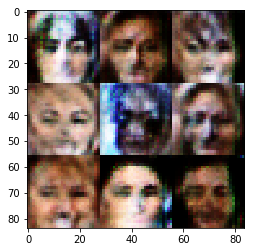

Epoch 1/1... Discriminator Loss: 1.3810... Generator Loss: 0.5240
Epoch 1/1... Discriminator Loss: 1.4243... Generator Loss: 0.7737
Epoch 1/1... Discriminator Loss: 1.3121... Generator Loss: 0.7271
Epoch 1/1... Discriminator Loss: 1.4449... Generator Loss: 1.0737
Epoch 1/1... Discriminator Loss: 1.5869... Generator Loss: 0.3999
Epoch 1/1... Discriminator Loss: 1.4521... Generator Loss: 0.4996
Epoch 1/1... Discriminator Loss: 1.2636... Generator Loss: 0.6997
Epoch 1/1... Discriminator Loss: 1.3236... Generator Loss: 1.2373
Epoch 1/1... Discriminator Loss: 1.4199... Generator Loss: 0.5173
Epoch 1/1... Discriminator Loss: 1.5260... Generator Loss: 0.7778


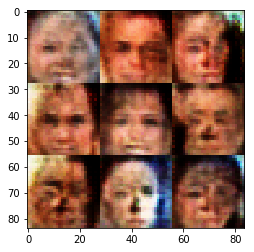

Epoch 1/1... Discriminator Loss: 1.3825... Generator Loss: 0.4564
Epoch 1/1... Discriminator Loss: 1.2440... Generator Loss: 0.6434
Epoch 1/1... Discriminator Loss: 1.3889... Generator Loss: 0.6293
Epoch 1/1... Discriminator Loss: 1.3909... Generator Loss: 0.5831
Epoch 1/1... Discriminator Loss: 1.3922... Generator Loss: 0.7157
Epoch 1/1... Discriminator Loss: 1.3540... Generator Loss: 0.7246
Epoch 1/1... Discriminator Loss: 1.3233... Generator Loss: 0.6764
Epoch 1/1... Discriminator Loss: 1.3071... Generator Loss: 0.7523
Epoch 1/1... Discriminator Loss: 1.0843... Generator Loss: 0.7721
Epoch 1/1... Discriminator Loss: 1.2212... Generator Loss: 0.6362


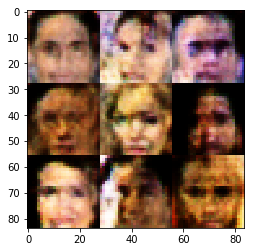

Epoch 1/1... Discriminator Loss: 1.4072... Generator Loss: 0.5791
Epoch 1/1... Discriminator Loss: 1.3170... Generator Loss: 0.5934
Epoch 1/1... Discriminator Loss: 1.5806... Generator Loss: 0.4096
Epoch 1/1... Discriminator Loss: 1.3764... Generator Loss: 0.6353
Epoch 1/1... Discriminator Loss: 1.3266... Generator Loss: 0.7894
Epoch 1/1... Discriminator Loss: 1.4733... Generator Loss: 0.3892
Epoch 1/1... Discriminator Loss: 1.5879... Generator Loss: 0.3477
Epoch 1/1... Discriminator Loss: 1.3697... Generator Loss: 0.8999
Epoch 1/1... Discriminator Loss: 1.7291... Generator Loss: 0.3027
Epoch 1/1... Discriminator Loss: 1.2985... Generator Loss: 0.5313


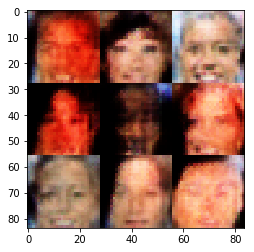

Epoch 1/1... Discriminator Loss: 1.3198... Generator Loss: 0.7248
Epoch 1/1... Discriminator Loss: 1.7093... Generator Loss: 1.4851
Epoch 1/1... Discriminator Loss: 1.4689... Generator Loss: 0.5757
Epoch 1/1... Discriminator Loss: 1.2925... Generator Loss: 0.9572
Epoch 1/1... Discriminator Loss: 1.4142... Generator Loss: 0.6023
Epoch 1/1... Discriminator Loss: 1.2949... Generator Loss: 0.7075
Epoch 1/1... Discriminator Loss: 1.4163... Generator Loss: 0.7695
Epoch 1/1... Discriminator Loss: 1.3874... Generator Loss: 0.6144
Epoch 1/1... Discriminator Loss: 1.5442... Generator Loss: 0.5461
Epoch 1/1... Discriminator Loss: 1.7162... Generator Loss: 0.2712


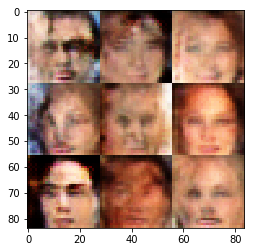

Epoch 1/1... Discriminator Loss: 1.3609... Generator Loss: 0.6444
Epoch 1/1... Discriminator Loss: 1.7833... Generator Loss: 1.3150
Epoch 1/1... Discriminator Loss: 1.5423... Generator Loss: 0.4192
Epoch 1/1... Discriminator Loss: 1.3328... Generator Loss: 0.4310
Epoch 1/1... Discriminator Loss: 1.4041... Generator Loss: 0.4580
Epoch 1/1... Discriminator Loss: 1.4107... Generator Loss: 0.6190
Epoch 1/1... Discriminator Loss: 1.2929... Generator Loss: 0.7042
Epoch 1/1... Discriminator Loss: 1.5301... Generator Loss: 0.3396
Epoch 1/1... Discriminator Loss: 1.5145... Generator Loss: 0.6822
Epoch 1/1... Discriminator Loss: 1.3356... Generator Loss: 0.5999


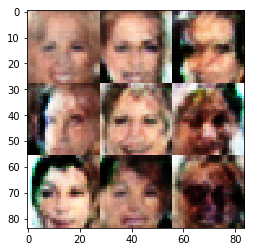

Epoch 1/1... Discriminator Loss: 1.3287... Generator Loss: 0.6597
Epoch 1/1... Discriminator Loss: 1.4452... Generator Loss: 0.5709
Epoch 1/1... Discriminator Loss: 1.3399... Generator Loss: 0.8715
Epoch 1/1... Discriminator Loss: 1.2450... Generator Loss: 0.8086
Epoch 1/1... Discriminator Loss: 1.3434... Generator Loss: 0.7787
Epoch 1/1... Discriminator Loss: 1.4227... Generator Loss: 0.6579
Epoch 1/1... Discriminator Loss: 1.1898... Generator Loss: 0.7728
Epoch 1/1... Discriminator Loss: 1.2794... Generator Loss: 0.9450
Epoch 1/1... Discriminator Loss: 1.2977... Generator Loss: 0.6944
Epoch 1/1... Discriminator Loss: 1.1513... Generator Loss: 1.0325


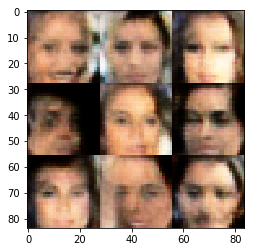

Epoch 1/1... Discriminator Loss: 1.3601... Generator Loss: 0.6538
Epoch 1/1... Discriminator Loss: 1.5066... Generator Loss: 1.3753
Epoch 1/1... Discriminator Loss: 1.2360... Generator Loss: 0.7625
Epoch 1/1... Discriminator Loss: 1.4129... Generator Loss: 0.5034
Epoch 1/1... Discriminator Loss: 1.3040... Generator Loss: 0.4617
Epoch 1/1... Discriminator Loss: 1.2637... Generator Loss: 0.8910
Epoch 1/1... Discriminator Loss: 1.3569... Generator Loss: 0.8689
Epoch 1/1... Discriminator Loss: 1.4025... Generator Loss: 0.8499
Epoch 1/1... Discriminator Loss: 1.3705... Generator Loss: 0.6257
Epoch 1/1... Discriminator Loss: 1.4129... Generator Loss: 0.7110


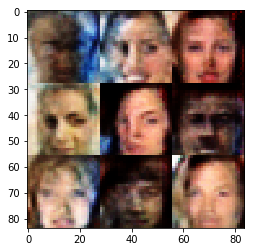

Epoch 1/1... Discriminator Loss: 1.3083... Generator Loss: 0.9458
Epoch 1/1... Discriminator Loss: 1.1875... Generator Loss: 0.7652
Epoch 1/1... Discriminator Loss: 1.4155... Generator Loss: 0.4672
Epoch 1/1... Discriminator Loss: 1.6354... Generator Loss: 0.3033
Epoch 1/1... Discriminator Loss: 1.4096... Generator Loss: 0.7506
Epoch 1/1... Discriminator Loss: 1.6033... Generator Loss: 1.0558
Epoch 1/1... Discriminator Loss: 1.3678... Generator Loss: 0.5640
Epoch 1/1... Discriminator Loss: 1.4271... Generator Loss: 0.5396
Epoch 1/1... Discriminator Loss: 1.4214... Generator Loss: 1.0136
Epoch 1/1... Discriminator Loss: 1.6700... Generator Loss: 0.3243


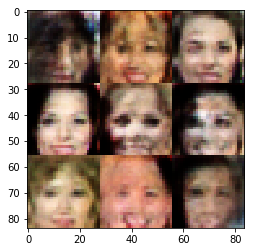

Epoch 1/1... Discriminator Loss: 1.3519... Generator Loss: 0.5630
Epoch 1/1... Discriminator Loss: 1.4467... Generator Loss: 0.4951
Epoch 1/1... Discriminator Loss: 1.3528... Generator Loss: 0.5349
Epoch 1/1... Discriminator Loss: 1.3200... Generator Loss: 0.5422
Epoch 1/1... Discriminator Loss: 1.4002... Generator Loss: 0.5983
Epoch 1/1... Discriminator Loss: 1.2842... Generator Loss: 0.5564
Epoch 1/1... Discriminator Loss: 1.3071... Generator Loss: 0.7399
Epoch 1/1... Discriminator Loss: 1.3793... Generator Loss: 0.6721
Epoch 1/1... Discriminator Loss: 1.4553... Generator Loss: 0.4560
Epoch 1/1... Discriminator Loss: 1.4217... Generator Loss: 0.6750


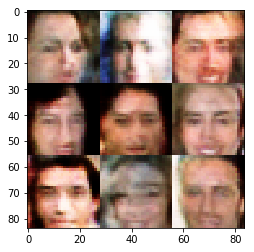

Epoch 1/1... Discriminator Loss: 1.4019... Generator Loss: 0.5843
Epoch 1/1... Discriminator Loss: 1.3625... Generator Loss: 0.5525
Epoch 1/1... Discriminator Loss: 1.3740... Generator Loss: 0.4617
Epoch 1/1... Discriminator Loss: 1.5431... Generator Loss: 0.8742
Epoch 1/1... Discriminator Loss: 1.4520... Generator Loss: 0.4476
Epoch 1/1... Discriminator Loss: 1.3786... Generator Loss: 1.0418
Epoch 1/1... Discriminator Loss: 1.3173... Generator Loss: 0.5657
Epoch 1/1... Discriminator Loss: 1.4631... Generator Loss: 0.4335
Epoch 1/1... Discriminator Loss: 1.4327... Generator Loss: 0.6997
Epoch 1/1... Discriminator Loss: 1.7377... Generator Loss: 1.4932


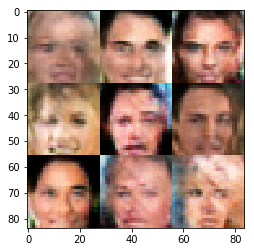

Epoch 1/1... Discriminator Loss: 1.2931... Generator Loss: 0.8409
Epoch 1/1... Discriminator Loss: 1.2036... Generator Loss: 0.8539
Epoch 1/1... Discriminator Loss: 1.2960... Generator Loss: 0.6862
Epoch 1/1... Discriminator Loss: 1.3974... Generator Loss: 0.7538
Epoch 1/1... Discriminator Loss: 1.2640... Generator Loss: 0.7641
Epoch 1/1... Discriminator Loss: 1.2984... Generator Loss: 0.7462
Epoch 1/1... Discriminator Loss: 1.2590... Generator Loss: 0.7315
Epoch 1/1... Discriminator Loss: 1.1945... Generator Loss: 0.7934
Epoch 1/1... Discriminator Loss: 1.3958... Generator Loss: 0.8361
Epoch 1/1... Discriminator Loss: 1.7810... Generator Loss: 1.4311


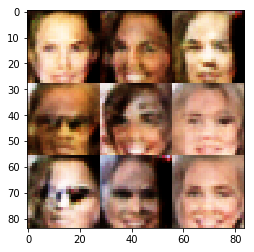

Epoch 1/1... Discriminator Loss: 1.4790... Generator Loss: 0.6154
Epoch 1/1... Discriminator Loss: 1.3991... Generator Loss: 0.7730
Epoch 1/1... Discriminator Loss: 1.4207... Generator Loss: 0.4564
Epoch 1/1... Discriminator Loss: 1.4966... Generator Loss: 0.5824
Epoch 1/1... Discriminator Loss: 1.2984... Generator Loss: 1.0577
Epoch 1/1... Discriminator Loss: 1.3726... Generator Loss: 0.5886
Epoch 1/1... Discriminator Loss: 1.2866... Generator Loss: 0.6878
Epoch 1/1... Discriminator Loss: 1.3569... Generator Loss: 0.9948
Epoch 1/1... Discriminator Loss: 1.3670... Generator Loss: 0.5364
Epoch 1/1... Discriminator Loss: 1.3453... Generator Loss: 0.8824


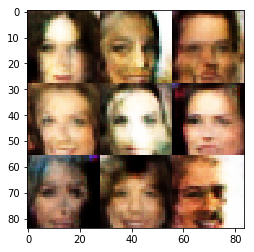

Epoch 1/1... Discriminator Loss: 1.2211... Generator Loss: 0.7592
Epoch 1/1... Discriminator Loss: 1.5334... Generator Loss: 1.0765
Epoch 1/1... Discriminator Loss: 1.2455... Generator Loss: 0.9912
Epoch 1/1... Discriminator Loss: 1.4792... Generator Loss: 0.4454
Epoch 1/1... Discriminator Loss: 1.3316... Generator Loss: 0.7085
Epoch 1/1... Discriminator Loss: 1.2773... Generator Loss: 0.6312
Epoch 1/1... Discriminator Loss: 1.3355... Generator Loss: 0.6215
Epoch 1/1... Discriminator Loss: 1.5050... Generator Loss: 0.4035
Epoch 1/1... Discriminator Loss: 1.3126... Generator Loss: 0.6672
Epoch 1/1... Discriminator Loss: 1.3306... Generator Loss: 0.6644


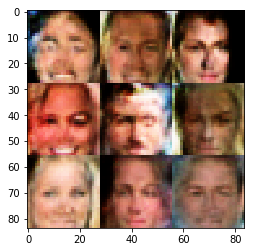

Epoch 1/1... Discriminator Loss: 1.3455... Generator Loss: 0.4991
Epoch 1/1... Discriminator Loss: 1.3152... Generator Loss: 0.5820
Epoch 1/1... Discriminator Loss: 1.4438... Generator Loss: 0.7978
Epoch 1/1... Discriminator Loss: 1.4731... Generator Loss: 1.1638
Epoch 1/1... Discriminator Loss: 1.4309... Generator Loss: 0.9175
Epoch 1/1... Discriminator Loss: 1.3851... Generator Loss: 0.5270
Epoch 1/1... Discriminator Loss: 1.7405... Generator Loss: 0.2687
Epoch 1/1... Discriminator Loss: 1.3963... Generator Loss: 0.9376
Epoch 1/1... Discriminator Loss: 1.3439... Generator Loss: 0.8432
Epoch 1/1... Discriminator Loss: 1.3021... Generator Loss: 0.6077


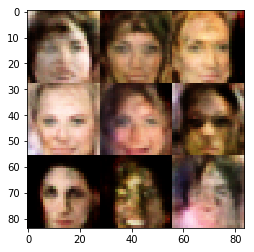

Epoch 1/1... Discriminator Loss: 1.2343... Generator Loss: 0.6101
Epoch 1/1... Discriminator Loss: 1.3371... Generator Loss: 0.5925
Epoch 1/1... Discriminator Loss: 1.3694... Generator Loss: 0.5842
Epoch 1/1... Discriminator Loss: 1.3568... Generator Loss: 0.6236
Epoch 1/1... Discriminator Loss: 1.1428... Generator Loss: 1.0750
Epoch 1/1... Discriminator Loss: 1.3966... Generator Loss: 0.9509
Epoch 1/1... Discriminator Loss: 1.3312... Generator Loss: 0.6732
Epoch 1/1... Discriminator Loss: 1.4501... Generator Loss: 0.6795
Epoch 1/1... Discriminator Loss: 1.2173... Generator Loss: 0.7602
Epoch 1/1... Discriminator Loss: 1.3589... Generator Loss: 0.8649


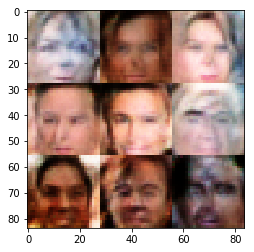

Epoch 1/1... Discriminator Loss: 1.4461... Generator Loss: 0.7690
Epoch 1/1... Discriminator Loss: 1.2347... Generator Loss: 0.8991
Epoch 1/1... Discriminator Loss: 1.3879... Generator Loss: 0.5205
Epoch 1/1... Discriminator Loss: 1.3655... Generator Loss: 0.8857
Epoch 1/1... Discriminator Loss: 1.2926... Generator Loss: 0.7686
Epoch 1/1... Discriminator Loss: 1.2842... Generator Loss: 0.8052
Epoch 1/1... Discriminator Loss: 1.3789... Generator Loss: 0.6635
Epoch 1/1... Discriminator Loss: 1.3928... Generator Loss: 0.8153
Epoch 1/1... Discriminator Loss: 1.3861... Generator Loss: 0.4089
Epoch 1/1... Discriminator Loss: 1.4224... Generator Loss: 0.6401


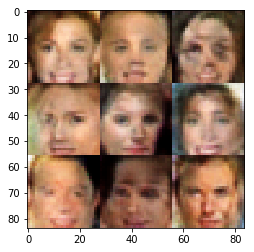

Epoch 1/1... Discriminator Loss: 1.2893... Generator Loss: 0.7066
Epoch 1/1... Discriminator Loss: 1.3924... Generator Loss: 0.9915
Epoch 1/1... Discriminator Loss: 1.4031... Generator Loss: 0.7149
Epoch 1/1... Discriminator Loss: 1.3566... Generator Loss: 0.7816
Epoch 1/1... Discriminator Loss: 1.3044... Generator Loss: 0.7424
Epoch 1/1... Discriminator Loss: 1.5180... Generator Loss: 0.5287
Epoch 1/1... Discriminator Loss: 1.2585... Generator Loss: 1.0099
Epoch 1/1... Discriminator Loss: 1.3737... Generator Loss: 0.5281
Epoch 1/1... Discriminator Loss: 1.3693... Generator Loss: 0.8936
Epoch 1/1... Discriminator Loss: 1.3414... Generator Loss: 0.5891


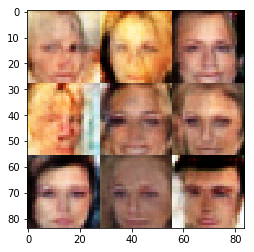

Epoch 1/1... Discriminator Loss: 1.4326... Generator Loss: 0.6379
Epoch 1/1... Discriminator Loss: 1.3702... Generator Loss: 0.7678
Epoch 1/1... Discriminator Loss: 1.4573... Generator Loss: 0.5624
Epoch 1/1... Discriminator Loss: 1.3751... Generator Loss: 0.4349
Epoch 1/1... Discriminator Loss: 1.3321... Generator Loss: 0.6696
Epoch 1/1... Discriminator Loss: 1.3708... Generator Loss: 0.6539
Epoch 1/1... Discriminator Loss: 1.3119... Generator Loss: 0.5412
Epoch 1/1... Discriminator Loss: 1.4433... Generator Loss: 0.8237
Epoch 1/1... Discriminator Loss: 1.3328... Generator Loss: 0.5928
Epoch 1/1... Discriminator Loss: 1.3317... Generator Loss: 0.6442


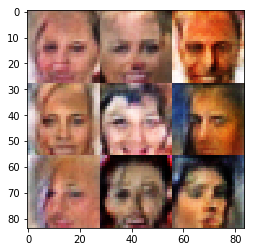

Epoch 1/1... Discriminator Loss: 1.4000... Generator Loss: 0.4571
Epoch 1/1... Discriminator Loss: 1.4074... Generator Loss: 0.9565
Epoch 1/1... Discriminator Loss: 1.3844... Generator Loss: 0.7843
Epoch 1/1... Discriminator Loss: 1.3641... Generator Loss: 0.8543
Epoch 1/1... Discriminator Loss: 1.3485... Generator Loss: 0.5299
Epoch 1/1... Discriminator Loss: 1.4696... Generator Loss: 0.8506
Epoch 1/1... Discriminator Loss: 1.4703... Generator Loss: 0.5891
Epoch 1/1... Discriminator Loss: 1.4470... Generator Loss: 0.4531
Epoch 1/1... Discriminator Loss: 1.2793... Generator Loss: 0.6276
Epoch 1/1... Discriminator Loss: 1.3730... Generator Loss: 0.5342


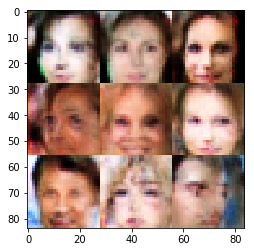

Epoch 1/1... Discriminator Loss: 1.3953... Generator Loss: 0.5168
Epoch 1/1... Discriminator Loss: 1.4091... Generator Loss: 0.7904
Epoch 1/1... Discriminator Loss: 1.3632... Generator Loss: 0.6819
Epoch 1/1... Discriminator Loss: 1.3747... Generator Loss: 0.7512
Epoch 1/1... Discriminator Loss: 1.5198... Generator Loss: 0.3825
Epoch 1/1... Discriminator Loss: 1.4224... Generator Loss: 0.9351
Epoch 1/1... Discriminator Loss: 1.3577... Generator Loss: 0.6137
Epoch 1/1... Discriminator Loss: 1.2998... Generator Loss: 0.6296
Epoch 1/1... Discriminator Loss: 1.4106... Generator Loss: 0.9806
Epoch 1/1... Discriminator Loss: 1.3132... Generator Loss: 0.6656


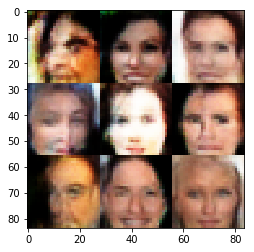

Epoch 1/1... Discriminator Loss: 1.4362... Generator Loss: 0.5007
Epoch 1/1... Discriminator Loss: 1.4654... Generator Loss: 0.6363
Epoch 1/1... Discriminator Loss: 1.2859... Generator Loss: 0.7757
Epoch 1/1... Discriminator Loss: 1.3321... Generator Loss: 0.7868
Epoch 1/1... Discriminator Loss: 1.3782... Generator Loss: 0.6974
Epoch 1/1... Discriminator Loss: 1.3935... Generator Loss: 1.1628
Epoch 1/1... Discriminator Loss: 1.3129... Generator Loss: 0.8971
Epoch 1/1... Discriminator Loss: 1.4102... Generator Loss: 0.8882
Epoch 1/1... Discriminator Loss: 1.3896... Generator Loss: 0.8185
Epoch 1/1... Discriminator Loss: 1.3732... Generator Loss: 0.4797


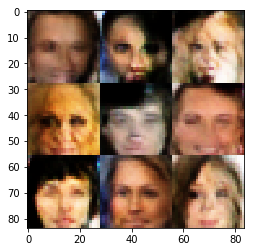

Epoch 1/1... Discriminator Loss: 1.5126... Generator Loss: 0.3927
Epoch 1/1... Discriminator Loss: 1.4853... Generator Loss: 1.0281
Epoch 1/1... Discriminator Loss: 1.2389... Generator Loss: 0.5788
Epoch 1/1... Discriminator Loss: 1.3314... Generator Loss: 0.5525
Epoch 1/1... Discriminator Loss: 1.4406... Generator Loss: 0.8368
Epoch 1/1... Discriminator Loss: 1.3716... Generator Loss: 0.6369
Epoch 1/1... Discriminator Loss: 1.2664... Generator Loss: 0.8943
Epoch 1/1... Discriminator Loss: 1.3785... Generator Loss: 0.7515
Epoch 1/1... Discriminator Loss: 1.2515... Generator Loss: 0.9094
Epoch 1/1... Discriminator Loss: 1.4445... Generator Loss: 0.5859


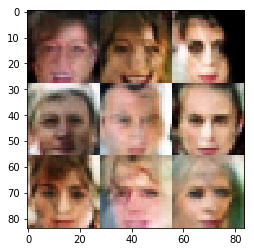

Epoch 1/1... Discriminator Loss: 1.3874... Generator Loss: 0.6908
Epoch 1/1... Discriminator Loss: 1.3312... Generator Loss: 0.7430
Epoch 1/1... Discriminator Loss: 1.2882... Generator Loss: 0.7701
Epoch 1/1... Discriminator Loss: 1.3816... Generator Loss: 0.5582
Epoch 1/1... Discriminator Loss: 1.2709... Generator Loss: 0.6376
Epoch 1/1... Discriminator Loss: 1.4040... Generator Loss: 0.8818


In [15]:
batch_size = 64
z_dim = 100
learning_rate = 0.002
beta1 = 0.4


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.